In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

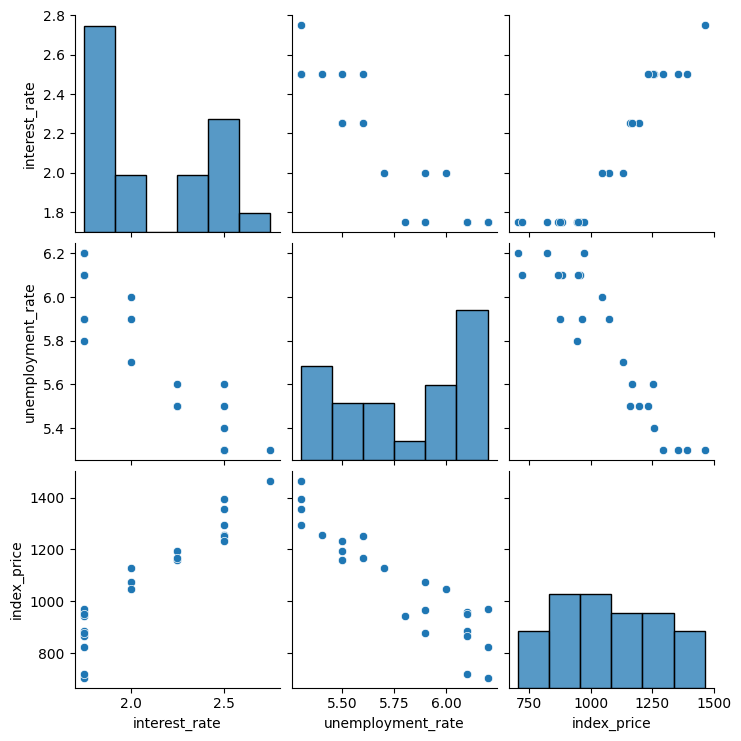

In [8]:
## let's do some visualisation
import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployement rate')

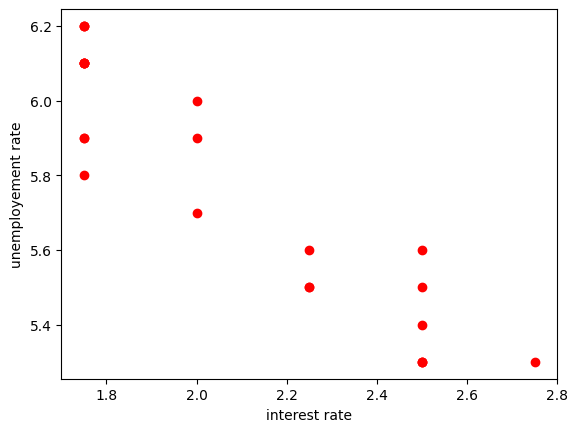

In [12]:
## visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployement rate')

In [19]:
## independent and dependent features 
# X = df_index[['interest_rate','unemployment_rate']] ## this is also a way 
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [20]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [22]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

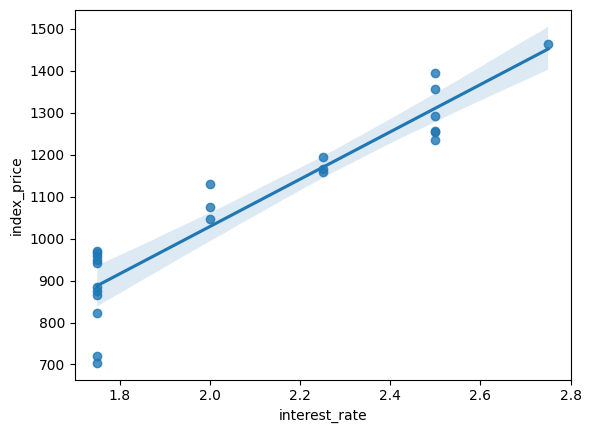

In [33]:
# sns.regplot(x = df_index['index_price'],y = df_index['unemployment_rate'])
# sns.regplot(data=df_index , x='index_price', y='unemployment_rate')
sns.regplot(data=df_index , x='interest_rate', y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

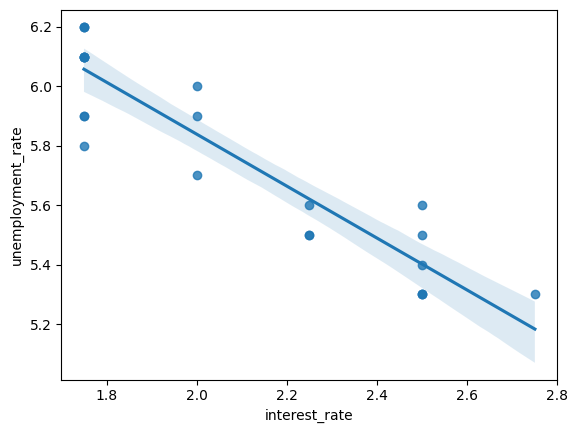

In [ ]:
sns.regplot(data=df_index,x='interest_rate',y='unemployment_rate')

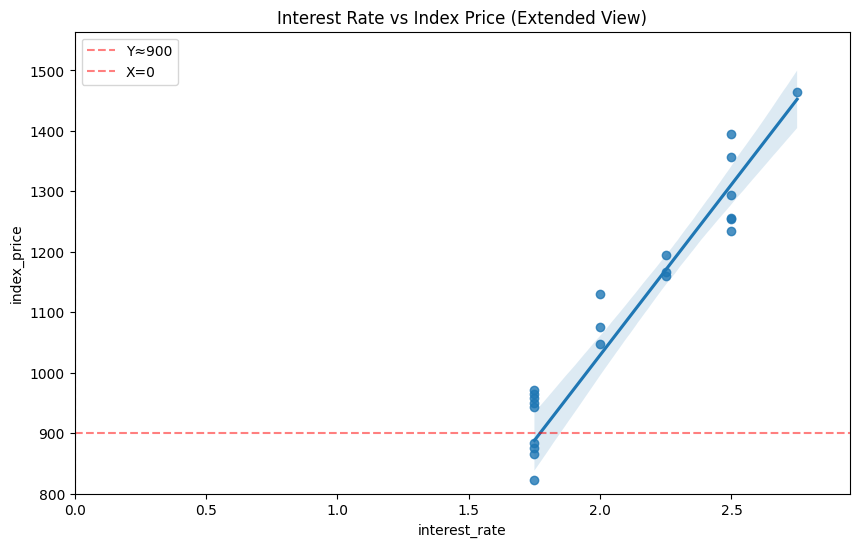

In [35]:
# Extend the plot to show y-intercept clearly
plt.figure(figsize=(10, 6))
sns.regplot(data=df_index, x='interest_rate', y='index_price')
plt.xlim(0, df_index['interest_rate'].max() + 0.2)  # Start x-axis from 0
plt.ylim(800, df_index['index_price'].max() + 100)   # Show y-intercept area
plt.axhline(y=900, color='red', linestyle='--', alpha=0.5, label='Y≈900')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='X=0')
plt.title('Interest Rate vs Index Price (Extended View)')
plt.legend()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [40]:
regression.fit(X_train,y_train)

LinearRegression()

In [64]:
## Cross Validations 

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)

In [65]:
validation_score

array([-62.17890383, -85.09549795, -51.24389355])

In [66]:
np.mean(validation_score)

np.float64(-66.17276510903106)

In [67]:
## Predictions
y_pred = regression.predict(X_test)

In [68]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:
mse = mean_squared_error(y_test,y_pred)
mea = mean_absolute_error(y_pred,y_test)
rmse = np.sqrt(mse)

In [71]:
print(mse)
print(mea)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [72]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)

In [73]:
score

0.8626502528670701

In [74]:
## Adjusted R-Squared
print(1-(1-score)*(len(y_test-1)/(len(y_test)-X_test.shape[1]-1)))

0.7253005057341402


## Asumptions

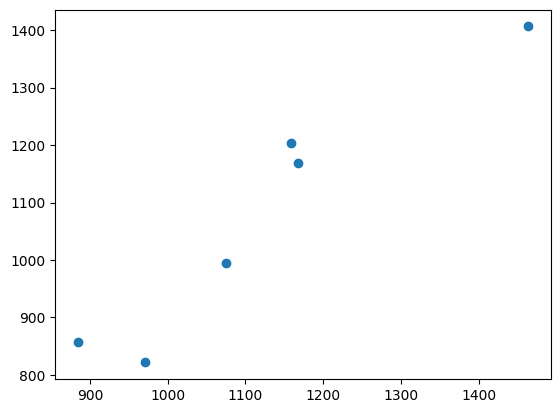

In [75]:
plt.scatter(y_test,y_pred)

In [76]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


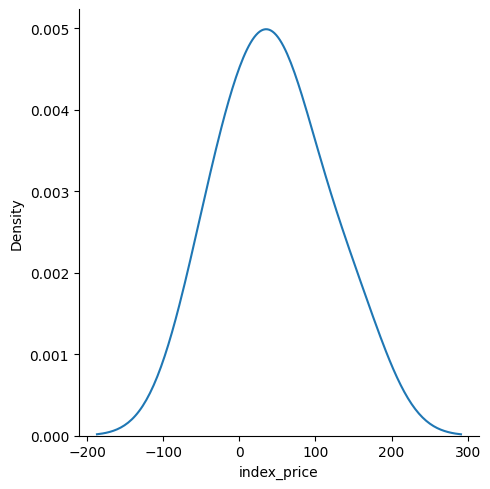

In [78]:
# plot the residuals
sns.displot(residuals,kind='kde')

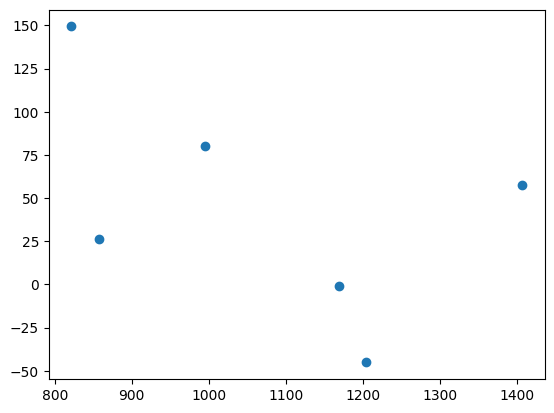

In [79]:
plt.scatter(y_pred,residuals)

In [83]:
regression.coef_

array([  88.27275507, -116.25716066])

In [80]:
#OLS Linear REgression
import statsmodels.api as sm

In [81]:
model = sm.OLS(y_train,X_train).fit()

In [82]:
model.summary()

d:\python programing\UD\MLBasics\LinearRegression\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 04 Jun 2025   Prob (F-statistic):                       0.754
Time:                        16:02:15   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""